In [7]:

import pandas as pd
import re
import matplotlib.pyplot as plt
import os
import numpy as np
from pycytominer import aggregate, annotate, normalize, feature_select, cyto_utils
from cytominer_eval import evaluate

import sys
sys.path.insert(0, "/Users/mbornhol/git/neural-profiling")
from utils import eval

In [2]:
pre =  '/Users/mbornhol/git/neural-profiling/pre-trained/results/'
efficientnet_sphered = pd.read_csv(pre + 'res_enrichment_spherized.csv')

In [3]:
df_meta = pd.read_csv('/Users/mbornhol/git/neural-profiling/pre-trained/data-prep/02_index_preperation/repurposing_info_external_moa_map_resolved.tsv', sep='\t')
df_meta = df_meta[['broad_sample', 'moa']]
df_meta.rename(columns = {'broad_sample' : 'Metadata_broad_sample', 'moa' : 'Metadata_moa'}, inplace=True)

In [4]:
# select subsections
index = pd.read_csv('/Users/mbornhol/git/neural-profiling/training/index/812_index.csv')

# Effect of batch size

Comparing:

- 927 / Cosine .02 / index 817 / 20E / batch size 256
- 918. Cosine.005 / index 817 / 20E / batch size 64

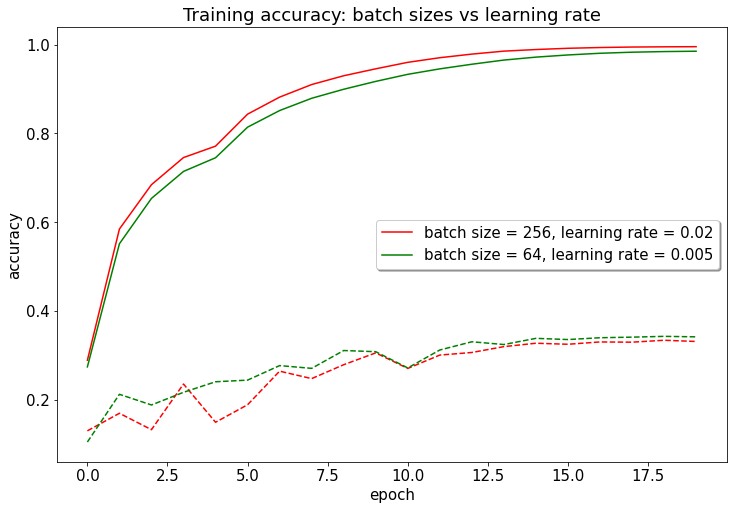

In [3]:
acc927 = pd.read_csv('accuracy/927.csv')
acc918 = pd.read_csv('accuracy/918.csv')

eval.plotting.accuracy_noloss(title="Training accuracy: batch sizes vs learning rate", index1='927', label_1='batch size = 256, learning rate = 0.02', index2='918', label_2='batch size = 64, learning rate = 0.005')

In [6]:
acc918.iloc[-1]

loss       0.2708
acc        0.9850
val_acc    0.3423
Name: 19, dtype: float64

In [ ]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 19})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("influence of LR")
plt.xlabel('step')


ax2 = ax.twinx()

ax.plot(acc927['loss'], 'b-', label = 'LR .02 BS 256')
ax2.plot(acc927['acc'], 'b', linestyle='dashdot', label = 'acc' )
ax2.plot(acc927['val_acc'], 'b',linestyle='dashed', label = 'val_acc')

ax.plot(acc918['loss'], 'r-', label = 'LR .005 BS 64')
ax2.plot(acc918['acc'], 'r', linestyle='dashdot', label = 'acc' )
ax2.plot(acc918['val_acc'], 'r', linestyle='dashed', label = 'val_acc')


ax.legend(loc = 'right', shadow=True)
#ax2.legend(loc = 'upper right', shadow=True)
ax.set_ylabel('loss')
ax2.set_ylabel('acc')

plt.show()

In [3]:

res927 = pd.read_csv('../runs/927/927_results.csv')
res918 = pd.read_csv('../runs/918/918_results.csv')


label927 = 'LR .02 BS 256'
label918 = 'LR .005 BS 64'

In [5]:
res918

,enrichment_percentile,threshold,ods_ratio,p-value,k,precision,recall
0,0.995,0.441883,11.487531,0.0,5.0,0.056343,0.040265
1,0.990,0.343383,9.282608,0.0,10.0,0.048644,0.066348
2,0.985,0.283769,7.509262,0.0,15.0,0.042111,0.085132
3,0.980,0.244766,6.079483,0.0,20.0,0.037008,0.096566
4,0.975,0.215404,5.366499,0.0,25.0,0.033421,0.110882
5,0.970,0.192352,4.784880,0.0,30.0,0.030125,0.118892
6,0.965,0.174755,4.305366,0.0,40.0,0.026050,0.136574
7,0.960,0.159992,3.894610,0.0,50.0,0.023850,0.155928


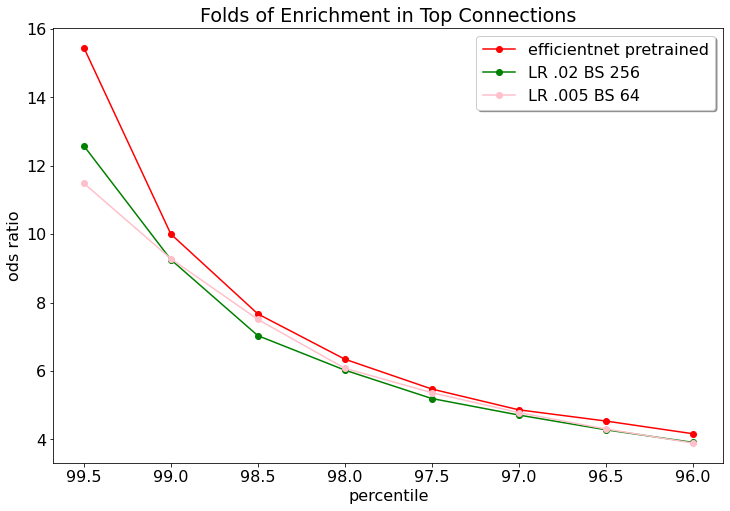

In [20]:
pre =  '/Users/mbornhol/git/neural-profiling/pre-trained/results/'
efficientnet_sphered = pd.read_csv(pre + 'res_enrichment_spherized.csv')
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
plt.plot(100*efficientnet_sphered["enrichment_percentile"], efficientnet_sphered["ods_ratio"], marker="o", color="red", label = 'efficientnet pretrained')
plt.plot(100*res927["enrichment_percentile"], res927["ods_ratio"], marker="o", color="green", label = label927)
plt.plot(100*res918["enrichment_percentile"], res918["ods_ratio"], marker="o", color="pink", label = label918)
plt.ylabel('ods ratio')
plt.xlabel('percentile')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()

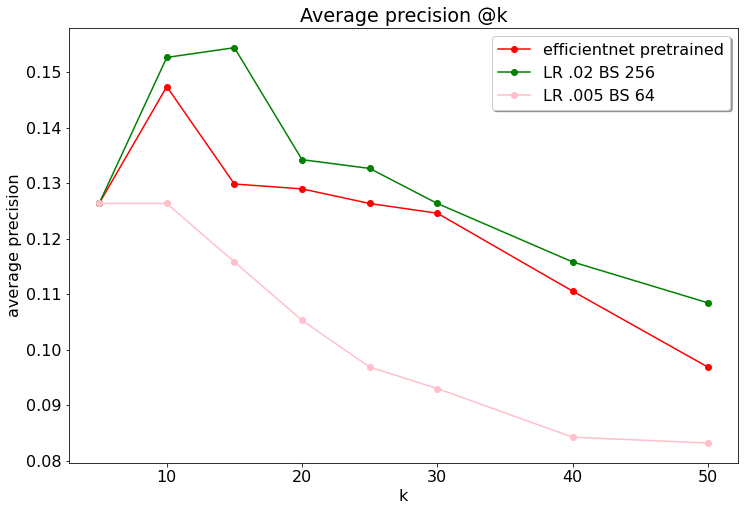

In [21]:
efficientnet_sphered = pd.read_csv(pre + 'res_prec_spherized.csv')
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision @k")
plt.plot(efficientnet_sphered["k"], efficientnet_sphered["precision"], marker="o", color="red", label = 'efficientnet pretrained')
plt.plot(res927["k"], res927["precision"], marker="o", color="green", label = label927)
plt.plot(res918["k"], res918["precision"], marker="o", color="pink", label = label918)
plt.ylabel('average precision')
plt.xlabel('k')
plt.legend(loc = 'upper right', shadow=True)
plt.show()

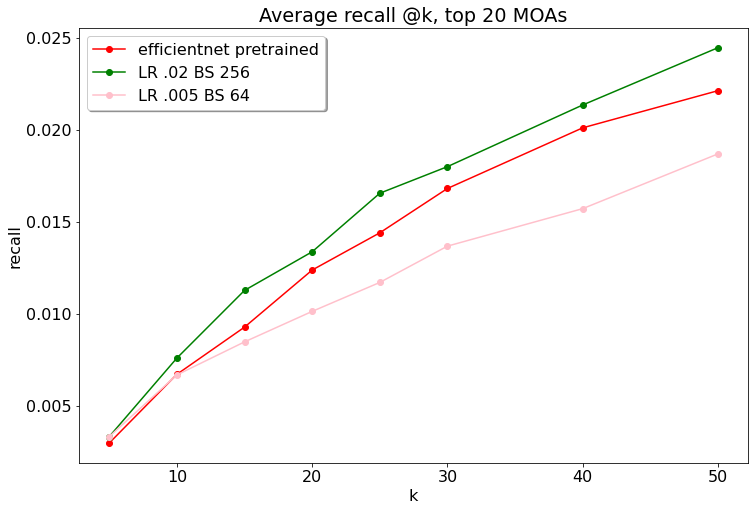

In [22]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average recall @k, top 20 MOAs")
plt.plot(efficientnet_sphered["k"], efficientnet_sphered["recall"], marker="o", color="red", label = 'efficientnet pretrained')
plt.plot(res927["k"], res927["recall"], marker="o", color="green", label = label927)
plt.plot(res918["k"], res918["recall"], marker="o", color="pink", label = label918)
plt.ylabel('recall')
plt.xlabel('k')
plt.legend(loc = 'upper left', shadow=True)
plt.show()

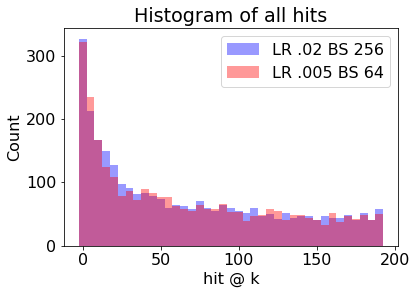

In [24]:
plt.style.use({'figure.facecolor':'white'})
plt.bar(res927['bins'], res927['h'], width= 5, alpha=0.4, color='blue', label=label927)
plt.bar(res918['bins'], res918['h'], width= 5, alpha=0.4, color='red', label=label918)
plt.xlabel('hit @ k')
plt.ylabel('Count')
plt.title('Histogram of all hits')
plt.legend()
plt.show()